# Examples

Here are some simple examples. We will need Jupyter Notebook to run this.

```
pip install ipython jupyter
```

## Installing the libraries needed

Now please install the libraries that we need for this, they are listed in the file [requirements.txt](requirements.txt).

To do that run the code in the following cell:

In [1]:
# Make sure you're in the right environment
import os
print(os.environ['CONDA_DEFAULT_ENV'])

epl


In [ ]:
%pip install eplda

In [ ]:
# If something doesn't work right, please install the dependencies manually.
# %pip install -r requirements.txt

## Examples

In [4]:
# Import libraries
import pandas as pd
from eplda.api import EPLAPI

In order to use most of the functions, it is very important to get the season id. We can get the it by passing the specified season label into ``get_season_id()``. Let's take the 2024/25 season as an example. 

(This notebook was being written before the season was over. Don't be surprised if you get different results when you re-run it.)

In [5]:
epl = EPLAPI()
season_id = epl.get_season_id("2024/25")
season_id

'719'

## Club Data

Similarly, we also need to get the club id to specify which club's data we need.

In [6]:
club_id_list = epl.club_id(season_id)
club_id_list

[{'Name': 'Arsenal', 'Team ID': '1'},
 {'Name': 'Aston Villa', 'Team ID': '2'},
 {'Name': 'Bournemouth', 'Team ID': '127'},
 {'Name': 'Brentford', 'Team ID': '130'},
 {'Name': 'Brighton', 'Team ID': '131'},
 {'Name': 'Chelsea', 'Team ID': '4'},
 {'Name': 'Crystal Palace', 'Team ID': '6'},
 {'Name': 'Everton', 'Team ID': '7'},
 {'Name': 'Fulham', 'Team ID': '34'},
 {'Name': 'Ipswich', 'Team ID': '8'},
 {'Name': 'Leicester', 'Team ID': '26'},
 {'Name': 'Liverpool', 'Team ID': '10'},
 {'Name': 'Man City', 'Team ID': '11'},
 {'Name': 'Man Utd', 'Team ID': '12'},
 {'Name': 'Newcastle', 'Team ID': '23'},
 {'Name': "Nott'm Forest", 'Team ID': '15'},
 {'Name': 'Southampton', 'Team ID': '20'},
 {'Name': 'Spurs', 'Team ID': '21'},
 {'Name': 'West Ham', 'Team ID': '25'},
 {'Name': 'Wolves', 'Team ID': '38'}]

As an alternative, you can specify ``output="df"`` to return results as a pandas DataFrame instead of JSON.

(Some other methods also have similar features!)

In [7]:
club_id_list = epl.club_id(season_id, output="df")
club_id_list

,Name,Team ID
0,Arsenal,1
1,Aston Villa,2
2,Bournemouth,127
3,Brentford,130
4,Brighton,131
5,Chelsea,4
6,Crystal Palace,6
7,Everton,7
8,Fulham,34
9,Ipswich,8


It is also possible to get details of all the teams in the Premier League by using ``club_incompseason()``, including abbreviations, cities, home stadiums and so on.

In [8]:
all_club = epl.club_incompseason(season_id)
all_club

[{'name': 'Arsenal',
  'club': {'name': 'Arsenal',
   'shortName': 'Arsenal',
   'abbr': 'ARS',
   'id': 1.0},
  'teamType': 'FIRST',
  'grounds': [{'name': 'Emirates Stadium',
    'city': 'London',
    'capacity': 60272.0,
    'location': {'latitude': 51.5548, 'longitude': -0.108533},
    'source': 'OPTA',
    'id': 52.0}],
  'shortName': 'Arsenal',
  'id': 1.0},
 {'name': 'Aston Villa',
  'club': {'name': 'Aston Villa',
   'shortName': 'Aston Villa',
   'abbr': 'AVL',
   'id': 2.0},
  'teamType': 'FIRST',
  'grounds': [{'name': 'Villa Park',
    'city': 'Birmingham',
    'capacity': 42682.0,
    'location': {'latitude': 52.5085, 'longitude': -1.88495},
    'source': 'OPTA',
    'id': 43.0}],
  'shortName': 'Aston Villa',
  'id': 2.0},
 {'name': 'Bournemouth',
  'club': {'name': 'Bournemouth',
   'shortName': 'Bournemouth',
   'abbr': 'BOU',
   'id': 127.0},
  'teamType': 'FIRST',
  'grounds': [{'name': 'Vitality Stadium',
    'city': 'Bournemouth',
    'capacity': 11464.0,
    'locat

Once we have the id information, we can use ``club_info()`` to extract information about the specified team. This method will be more detailed than ``club_incompseason()``, including some information about the training ground and youth team.

In [9]:
liverpool_id = 10 # We already have this by calling club_id() above
liverpool_info = epl.club_info(liverpool_id)
liverpool_info

{'name': 'Liverpool',
 'shortName': 'Liverpool',
 'abbr': 'LIV',
 'founded': 1892,
 'city': 'Liverpool',
 'postalCode': 'L4 0TH',
 'teams': [{'name': 'Liverpool',
   'teamType': 'FIRST',
   'grounds': [{'name': 'Anfield',
     'city': 'Liverpool',
     'compSeasonIds': [384,
      1,
      2,
      3,
      4,
      773,
      5,
      6,
      7,
      8,
      9,
      10,
      11,
      12,
      13,
      270,
      14,
      15,
      16,
      17,
      274,
      18,
      19,
      20,
      21,
      22,
      279,
      25,
      26,
      27,
      540,
      28,
      29,
      414,
      30,
      31,
      288,
      32,
      418,
      676,
      292,
      37,
      424,
      40,
      42,
      429,
      54,
      56,
      184,
      698,
      700,
      578,
      71,
      712,
      328,
      72,
      587,
      76,
      333,
      205,
      78,
      206,
      719,
      79,
      466,
      210,
      338,
      212,
      85,
      341,
      214,
    

Next, we can also look at the performance of clubs based on specific data types. By calling ``club_all_stat_types()`` , we can see what kind of data is available.

In [10]:
club_stats_type = epl.club_rankings_list_stat_types()
club_stats_type

{'General': ['wins',
  'losses',
  'draws',
  'goals',
  'total_red_card',
  'total_yel_card'],
 'Attack': ['total_scoring_att',
  'ontarget_scoring_att',
  'hit_woodwork',
  'att_hd_goal',
  'att_pen_goal',
  'att_freekick_goal',
  'att_ibox_goal',
  'att_obox_goal',
  'goal_fastbreak',
  'total_offside'],
 'Defence': ['goals_conceded',
  'clean_sheet',
  'saves',
  'outfielder_block',
  'interceptions',
  'total_tackle',
  'penalty_save',
  'last_man_tackle',
  'total_clearance',
  'Headed clearances',
  'clearance_off_line',
  'own_goals',
  'penalty_conceded',
  'pen_goals_conceded',
  'dispossessed',
  'total_high_claim',
  'punches'],
 'Teamplay': ['total_pass',
  'total_through_ball',
  'touches',
  'total_long_balls',
  'backward_pass',
  'total_cross',
  'corner_taken']}

As an example, we can plot a chart to check which teams excel in counterattacking performances base on the data we get by calling ``club_rankings()``.

In [11]:
# # If you haven't installed matplotlib yet, run this cell:
# %pip install matplotlib

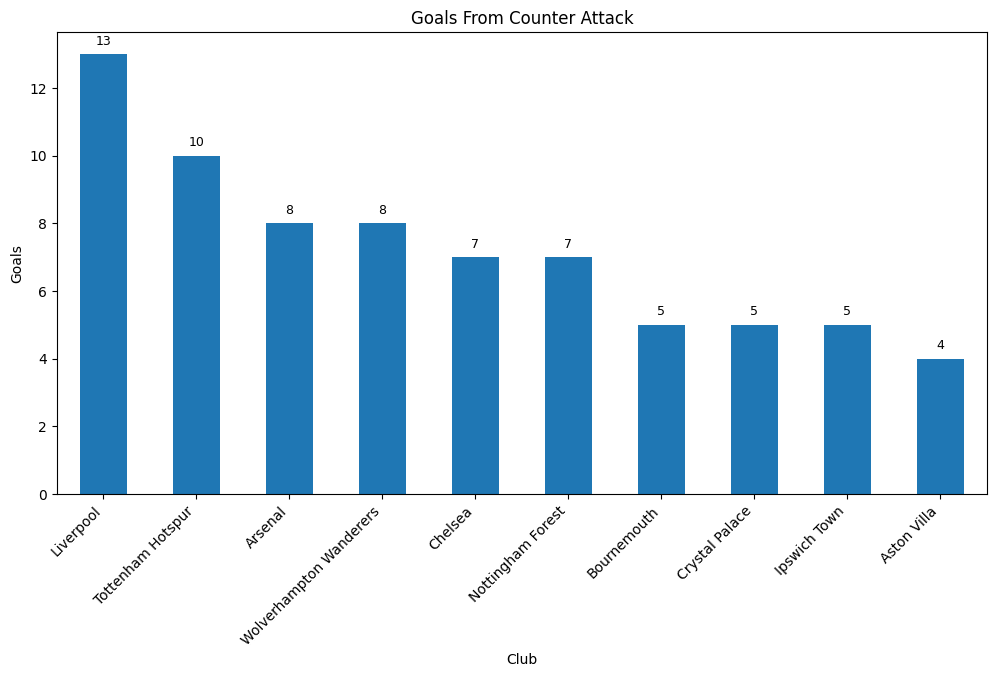

In [12]:
import matplotlib.pyplot as plt

counter_attack = epl.club_rankings("goal_fastbreak", season_id,"df")
top10 = counter_attack.head(10).sort_values(by="Stat", ascending=False)

plt.figure(figsize=(12, 6))
top10.plot(
    x="Club", 
    y="Stat", 
    kind="bar", 
    title="Goals From Counter Attack", 
    legend=False,
    ax=plt.gca()
)

plt.xticks(rotation=45, ha='right')
plt.ylabel("Goals")

for i, val in enumerate(top10["Stat"]):
    plt.text(i, val + 0.2, int(val), ha='center', va='bottom', fontsize=9)

Besides, we can use ``club_stats()`` in case we want to study the data of a specific club.

In [13]:
all_data = epl.club_stats(club_id=liverpool_id, season_id=season_id)
all_data

{'outfielder_block': 79.0,
 'effective_clearance': 569.0,
 'touches': 22254.0,
 'interception': 251.0,
 'total_final_third_passes': 5194.0,
 'aerial_lost': 303.0,
 'fwd_pass': 5112.0,
 'possession_percentage': 1797.2,
 'blocked_pass': 221.0,
 'poss_lost_ctrl': 3829.0,
 'total_pass': 16488.0,
 'duel_won': 1421.0,
 'interception_won': 251.0,
 'total_long_balls': 1469.0,
 'dispossessed': 288.0,
 'total_fwd_zone_pass': 9870.0,
 'long_pass_own_to_opp': 1881.0,
 'final_third_entries': 1884.0,
 'poss_won_mid_3rd': 617.0,
 'open_play_pass': 15855.0,
 'put_through': 496.0,
 'total_back_zone_pass': 7201.0,
 'accurate_back_zone_pass': 6634.0,
 'accurate_fwd_zone_pass': 7728.0,
 'backward_pass': 2663.0,
 'total_throws': 566.0,
 'total_cross_nocorner': 413.0,
 'aerial_won': 341.0,
 'total_launches': 450.0,
 'pen_area_entries': 1049.0,
 'total_cross': 583.0,
 'ball_recovery': 1513.0,
 'duel_lost': 1443.0,
 'poss_lost_all': 3829.0,
 'rightside_pass': 4513.0,
 'long_pass_own_to_opp_success': 1209.0,
 

``club_stats()`` also supports specifying specific data types. We can get all the callable fields with ``club_stats_list_stat_types()``.

In [14]:
# This dictionary is collated by LLM and does not ensure that all fields are valid
club_single_all_stat_types = epl.club_stats_list_stat_types()
club_single_all_stat_types

['gameweek',
 'wins',
 'losses',
 'draws',
 'goals',
 'goals_conceded',
 'clean_sheet',
 'total_pass',
 'accurate_pass',
 'poss_won_att_3rd',
 'poss_won_mid_3rd',
 'poss_won_def_3rd',
 'total_cross',
 'accurate_cross',
 'total_through_ball',
 'accurate_through_ball',
 'total_scoring_att',
 'ontarget_scoring_att',
 'big_chance_created',
 'big_chance_missed',
 'goal_assist',
 'goal_assist_openplay',
 'goal_assist_setplay',
 'goal_assist_deadball',
 'goals_openplay',
 'goal_fastbreak',
 'subs_goals',
 'hit_woodwork',
 'saves',
 'penalty_won',
 'penalty_conceded',
 'penalty_save',
 'penalty_faced',
 'yellow_card',
 'total_yel_card',
 'red_card',
 'total_red_card',
 'att_freekick_total',
 'att_post_left',
 'att_post_right',
 'att_miss_high_left',
 'att_miss_high_right',
 'total_long_balls',
 'accurate_long_balls',
 'interception',
 'tackles',
 'blocked_scoring_att',
 'aerial_won',
 'aerial_lost',
 'duel_won',
 'duel_lost',
 'total_launches',
 'accurate_launches',
 'final_third_entries',
 'b

In [15]:
fields = [
    'gameweek', 'wins', 'losses', 'draws', 'goals',
    'total_scoring_att', 'big_chance_created', 'big_chance_missed'
]
stats = {field: epl.club_stats(liverpool_id, season_id, stat_type=field) for field in fields}
df_club_stats = pd.DataFrame([stats])
df_club_stats

,gameweek,wins,losses,draws,goals,total_scoring_att,big_chance_created,big_chance_missed
0,None,22.0,2.0,7.0,72.0,523.0,89.0,71.0


## Player Data

There is a wealth of statistics about players, and we can use ``player_rankings_list_stat_types()`` to see what data has been recorded.

In [16]:
# This dictionary is collated by LLM and does not ensure that all fields are valid
player_stat_types = epl.player_rankings_list_stat_types()
player_stat_types

{'General': ['appearances', 'wins', 'losses', 'draws', 'minsPlayed'],
 'Attack': ['goals',
  'goal_assist',
  'total_scoring_att',
  'ontarget_scoring_att',
  'hit_woodwork',
  'big_chance_created',
  'big_chance_missed',
  'att_pen_goal',
  'att_freekick_goal',
  'att_hd_goal',
  'att_ibox_goal',
  'att_obox_goal',
  'total_offside',
  'oal_fastbreak',
  'corner_taken'],
 'Teamplay': ['total_pass',
  'pass_success',
  'total_cross',
  'cross_accuracy',
  'total_through_ball',
  'total_long_balls',
  'touches',
  'key_passes'],
 'Defence': ['clean_sheet',
  'goals_conceded',
  'tackle_success',
  'last_man_tackle',
  'blocked_scoring_att',
  'interception',
  'clearance_off_line',
  'recoveries',
  'duel_won',
  'duel_lost',
  'aerial_won',
  'aerial_lost',
  'own_goals',
  'penalty_conceded'],
 'Discipline': ['yellow_card', 'red_card', 'fouls', 'offside'],
 'Goalkeeping': ['saves',
  'penalty_save',
  'punches',
  'high_claim',
  'catch',
  'sweeper_clearance',
  'throw_out',
  'goal_

Once the ``stat_type`` is clear, we can use ``player_rankings()`` to quickly generate player rankings on a particular metric.

In [17]:
goals_ranking = epl.player_rankings("goals", season_id, output="df")
goals_ranking.head(10)

,Rank,Player,Club,Nationality,Stat
0,1.0,Mohamed Salah,Liverpool,Egypt,27.0
1,2.0,Erling Haaland,Manchester City,Norway,21.0
2,3.0,Alexander Isak,Newcastle United,Sweden,20.0
3,4.0,Chris Wood,Nottingham Forest,New Zealand,18.0
4,5.0,Bryan Mbeumo,Brentford,Cameroon,16.0
5,6.0,Cole Palmer,Chelsea,England,14.0
6,6.0,Yoane Wissa,Brentford,DR Congo,14.0
7,8.0,Matheus Cunha,Wolverhampton Wanderers,Brazil,13.0
8,8.0,Jean-Philippe Mateta,Crystal Palace,France,13.0
9,8.0,Ollie Watkins,Aston Villa,England,13.0


In [18]:
big_chance_created = epl.player_rankings("att_hd_goal", season_id, output="df")
big_chance_created.head(10)

,Rank,Player,Club,Nationality,Stat
0,1.0,Chris Wood,Nottingham Forest,New Zealand,6.0
1,2.0,Erling Haaland,Manchester City,Norway,4.0
2,2.0,Alexander Isak,Newcastle United,Sweden,4.0
3,2.0,Ollie Watkins,Aston Villa,England,4.0
4,2.0,Yoane Wissa,Brentford,DR Congo,4.0
5,6.0,Gabriel Magalhães,Arsenal,Brazil,3.0
6,6.0,Mikel Merino,Arsenal,Spain,3.0
7,6.0,Harry Wilson,Fulham,Wales,3.0
8,9.0,Rodrigo Bentancur,Tottenham Hotspur,Uruguay,2.0
9,9.0,Jarrod Bowen,West Ham United,England,2.0


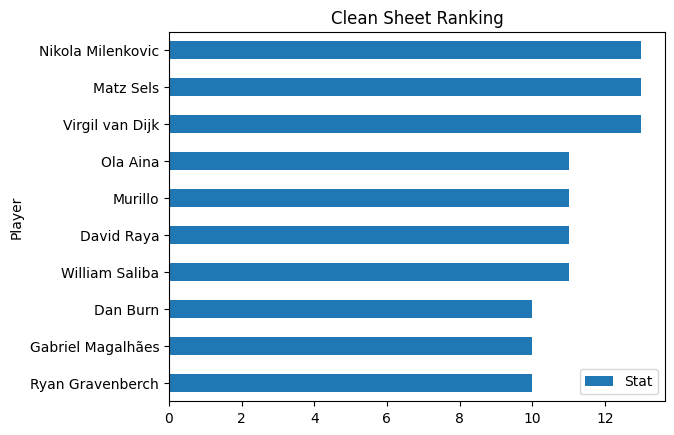

In [19]:
clean_sheet = epl.player_rankings("clean_sheet", season_id, output="df")
clean_sheet.head(10).plot(x="Player", y="Stat", kind="barh", title="Clean Sheet Ranking")
plt.gca().invert_yaxis()

But how do we get more detailed data about individual? 

Still the same, we need to specify the ID of the player first. We can use ``player_search_by_name()`` to find a player (or players).

In [20]:
search_result_1 = epl.player_search_by_name("Kerkez", season_id,"df")
search_result_1

,ID,Name,Position,Current Team,Nationality
0,116665,Milos Kerkez,D,Bournemouth,Hungary


What if the search term is a more popular name?

In [21]:
search_result_2 = epl.player_search_by_name("James", season_id,"df")
search_result_2

,ID,Name,Position,Current Team,Nationality
0,10565,James Bree,D,Southampton,England
1,14571,Reece James,D,Chelsea,England
2,8456,James Maddison,M,Tottenham Hotspur,England
3,2100,James Milner,M,Brighton & Hove Albion,England
4,8143,James Tarkowski,D,Everton,England


As you can see, this method does not require the player's full name. Even if we're not sure of the player's full name, it can still be confirmed by current team or nationality.

We can also use ``player_id()`` to get the data quickly if you can remember the player's name. However, it is recommended to enter the full name of the player to avoid confusion.

In [22]:
mo_id = epl.player_id("Mohamed Salah",season_id)
mo_id

'5178'

Afterwards, we can use ``player_info()`` to get the details of the specified player.

In [23]:
mo_stats = epl.player_stats(mo_id, season_id)
mo_stats

{'entity': {'playerId': 47184.0,
  'info': {'position': 'F',
   'shirtNum': 11.0,
   'positionInfo': 'Left/Centre/Right Winger',
   'loan': False},
  'nationalTeam': {'isoCode': 'EG', 'country': 'Egypt', 'demonym': 'Egyptian'},
  'birth': {'date': {'millis': 708566400000.0, 'label': '15 June 1992'},
   'country': {'isoCode': 'EG', 'country': 'Egypt', 'demonym': 'Egyptian'},
   'place': 'Nagrig'},
  'age': '32 years 297 days',
  'name': {'display': 'Mohamed Salah',
   'first': 'Mohamed',
   'last': 'Salah Hamed Mahrous Ghaly'},
  'id': 5178.0},
 'stats': [{'name': 'appearances',
   'value': 31.0,
   'description': 'Todo: appearances',
   'additionalInfo': {}},
  {'name': 'game_started',
   'value': 31.0,
   'description': 'Todo: game_started',
   'additionalInfo': {}},
  {'name': 'winning_goal',
   'value': 9.0,
   'description': 'Todo: winning_goal',
   'additionalInfo': {}},
  {'name': 'times_tackled',
   'value': 118.0,
   'description': 'Todo: times_tackled',
   'additionalInfo': {}

In [24]:
# Some data clean-up
entity = mo_stats['entity']
stats_list = mo_stats['stats']

stats_dict = {stat['name']: stat['value'] for stat in stats_list}

player_summary = {
    "name": entity['name']['display'],
    "position": entity['info']['position'],
    "shirt number": entity['info'].get('shirtNum'),
    "age": entity.get('age'),
    "appearances": stats_dict.get('appearances'),
    "goals": stats_dict.get('goals'),
    "goal assist": stats_dict.get('goal_assist')
}

df_player = pd.DataFrame([player_summary])
df_player

,name,position,shirt number,age,appearances,goals,goal assist
0,Mohamed Salah,F,11.0,32 years 297 days,31.0,27.0,17.0
